In [41]:
from sklearn.datasets import load_iris
import pandas as pd

columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris = load_iris()
iris_data = pd.DataFrame(iris.data , columns = columns)
class_mapping = {0 : 'setosa', 1 : 'versicolor', 2 : 'virginica'}
iris_target = pd.DataFrame(iris.target, columns=['class labels'])
iris_target = iris_target['class labels'].map(class_mapping)
iris_df = pd.concat([iris_data, iris_target],axis = 1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [73]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class labels         0
dtype: int64

In [75]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class labels       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [77]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

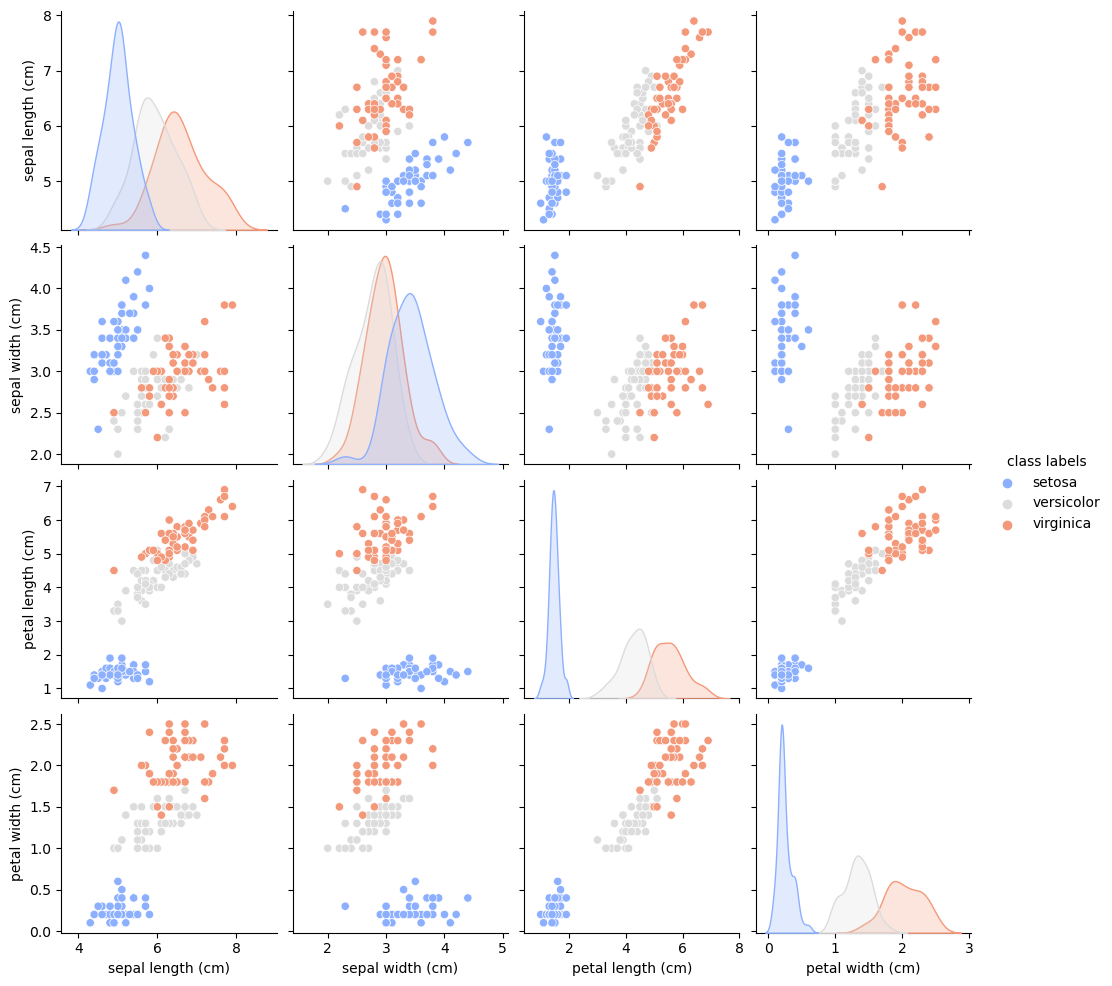

In [45]:
import seaborn as sns

sns.pairplot(iris_df, hue='class labels', palette = 'coolwarm')


Observed that **setosa** is well-separated from other two flowers and also has comparatively shorter length compared to others two.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

random_clf = RandomForestClassifier(random_state=42)
random_clf.fit(X_train, y_train)
random_clf.score(X_train, random_clf.predict(X_train))

1.0

Worked well in training set, let's perform cross-validation !!

In [97]:
from sklearn.model_selection import cross_val_score
import numpy as np 
rf_cv_results = cross_val_score(random_clf, iris_data, iris_target, cv = 10)
np.mean(rf_cv_results)

0.96

In [63]:
random_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [93]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators' : np.arange(0, 100),
    'max_depth' : np.arange(1, 10),
}

rnd_rf_clf = RandomizedSearchCV(random_clf, param_dist, cv = 10, n_iter = 5, random_state=42)
rnd_rf_clf.fit(X_train, y_train)
rnd_rf_clf.best_params_, rnd_rf_clf.best_score_

({'n_estimators': 70, 'max_depth': 3}, 0.9454545454545453)

In [67]:
random_clf.score(X_test, random_clf.predict(X_test))

1.0

In [71]:
X_new = [[5.1, 3.5, 1.4, 0.2]]
random_clf.predict(X_new)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)